**READING THE DATASET**

In [5]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [6]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [7]:
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")
test.head()

The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [8]:
# We will change the Timestamp columns
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   timestamp                               909604 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    909604 non-null  float64       
 2   active_power_raw                        909604 non-null  float64       
 3   ambient_temperature                     909604 non-null  float64       
 4   generator_speed                         909604 non-null  float64       
 5   generator_winding_temp_max              909604 non-null  float64       
 6   grid_power10min_average                 909604 non-null  float64       
 7   nc1_inside_temp                         909604 non-null  float64       
 8   nacelle_temp                            909604 non-null  float64       
 9   reactice_power_calculated_by_converte

In [5]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [9]:
train.drop(['timestamp'],axis=1,inplace=True)

**Understanding and exploring the columns and dataset better**


In [21]:
DataProfile = ProfileReport(train, title = "Wind Turbine Data Profile Report", explorative=True, minimal=True)
DataProfile.to_file(output_file="DataProfile.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
train.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,199.487161,5.894950,0.651916,46.328595
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,104.617261,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,98.916060,4.400753,0.432129,44.816740
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,232.821159,5.637207,0.583863,46.302899
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,287.667503,7.092771,0.798240,47.733105
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,359.455531,19.795001,9.534769,65.037689


In [8]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

There are no NULL values to deal with.

In [10]:
# Creating a Numerical dataframe and omitting Timestamp column
train_num = train.select_dtypes(["float64"])
train_cat = train.select_dtypes(["object"])
train_num.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


In [10]:
train_cat.shape

(909604, 1)

In [11]:
train_num.skew(axis=0)

active_power_calculated_by_converter      1.094894
active_power_raw                          1.079560
ambient_temperature                      -0.405606
generator_speed                          -0.432870
generator_winding_temp_max                0.482791
grid_power10min_average                   1.008062
nc1_inside_temp                           0.040530
nacelle_temp                             -0.427542
reactice_power_calculated_by_converter    1.731298
reactive_power                            1.638332
wind_direction_raw                       -0.363971
wind_speed_raw                            0.718327
wind_speed_turbulence                     2.205472
Target                                    0.705359
dtype: float64

In [12]:
for c in train_num:
    q1 = train_num[c].quantile(0.25)
    q3 = train_num[c].quantile(0.75)
    iqr = q3 - q1
    fence_low = q3 - 1.5*iqr
    fence_high = q1 + 1.5*iqr
    lower_out = len(train_num.loc[(train_num[c] < fence_low), c])
    upper_out = len(train_num.loc[(train_num[c] > fence_high), c])
    outlier_count = lower_out + upper_out
    prop_outlier = outlier_count/len(train_num)
    print(c, ": "+"{:.2%}".format(prop_outlier))

active_power_calculated_by_converter : 14.09%
active_power_raw : 14.16%
ambient_temperature : 1.49%
generator_speed : 1.66%
generator_winding_temp_max : 22.78%
grid_power10min_average : 13.61%
nc1_inside_temp : 20.90%
nacelle_temp : 25.87%
reactice_power_calculated_by_converter : 35.88%
reactive_power : 31.05%
wind_direction_raw : 0.19%
wind_speed_raw : 14.73%
wind_speed_turbulence : 15.17%
Target : 19.60%


**DATA VISUALIZATION**

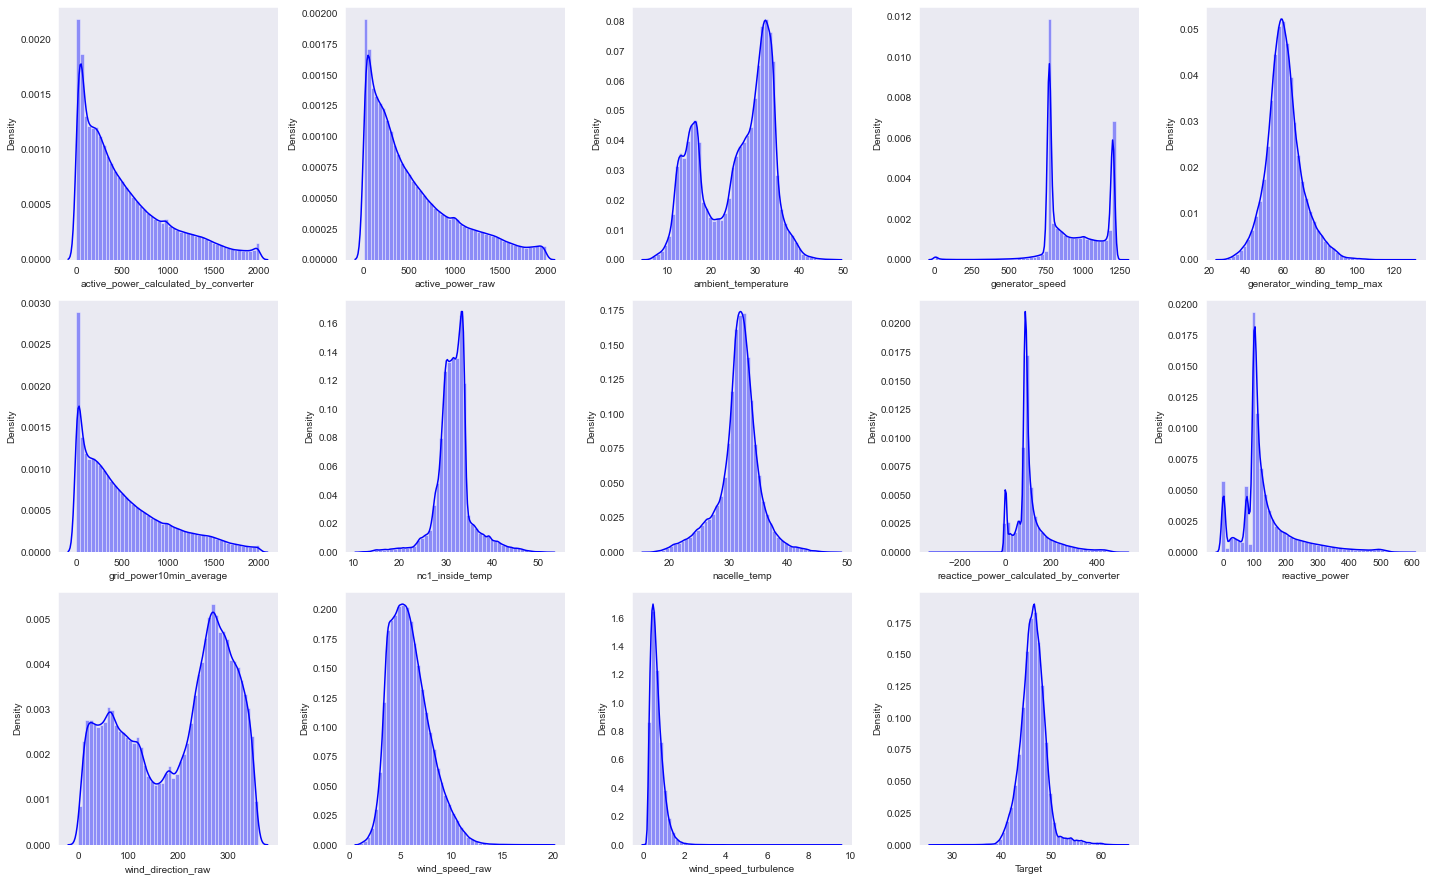

In [28]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train_num)):
    plt.subplot(4,5,i+1)
    sns.distplot(train_num[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

Some are normally distributed; and some left skewed. The target variable ('Target') is normally distributed. Let's apply a power transformer on the data and see how that affects the distributions.

In [13]:
train_num.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,54.346095


In [11]:
train_num_feat = train_num.drop('Target', axis=1)
train_num_feat.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068


In [12]:
# Applying normalization & transformation to see if it reduces the impact of outliers
from sklearn.preprocessing import PowerTransformer

# Init
pt = PowerTransformer()

train_num_feat = pd.DataFrame(pt.fit_transform(train_num_feat), columns=train_num_feat.columns)
train_num_feat.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


In [13]:
train_num_feat.skew(axis=0)

active_power_calculated_by_converter     -0.110339
active_power_raw                         -0.097555
ambient_temperature                      -0.232208
generator_speed                          -0.023327
generator_winding_temp_max                0.016822
grid_power10min_average                  -0.166983
nc1_inside_temp                           0.202477
nacelle_temp                              0.119152
reactice_power_calculated_by_converter   -1.465851
reactive_power                            0.100957
wind_direction_raw                       -0.406996
wind_speed_raw                           -0.001060
wind_speed_turbulence                     0.046962
dtype: float64

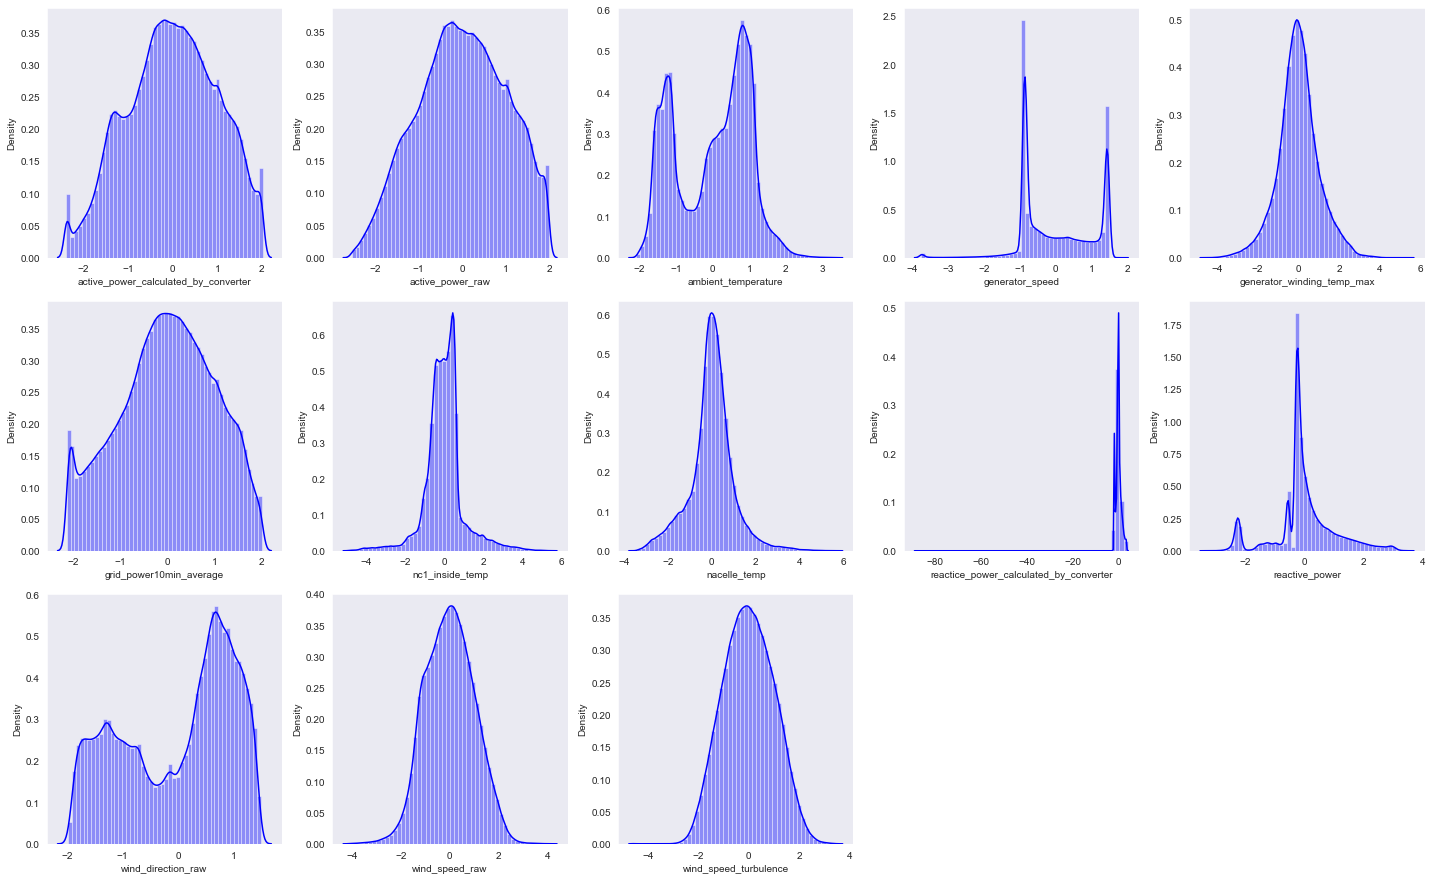

In [33]:
# Plotting the distributions of the numerical features after applying log transformation
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train_num_feat)):
    plt.subplot(4,5,i+1)
    sns.distplot(train_num_feat[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

The Power transformer has improved the distribution. There are some outliners for the " reactice_power_calculated_by_converter" feature; we will see how to treat that in later stages. But for now this transformation can be applied and taken forward.

**FEATURE SELECTION**

In [34]:
train.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [14]:
feat_cols = ['active_power_calculated_by_converter', 'active_power_raw', 'ambient_temperature',
              'generator_speed', 'generator_winding_temp_max', 'grid_power10min_average', 'nc1_inside_temp',
              'nacelle_temp', 'reactice_power_calculated_by_converter', 'reactive_power', 'wind_direction_raw',
              'wind_speed_raw', 'wind_speed_turbulence']

cat_cols = ['turbine_id']

X = train_num_feat[feat_cols]
y = train['Target']

In [15]:
X.shape[1]

13

In [19]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


**Correlation check for multi-collinearity**

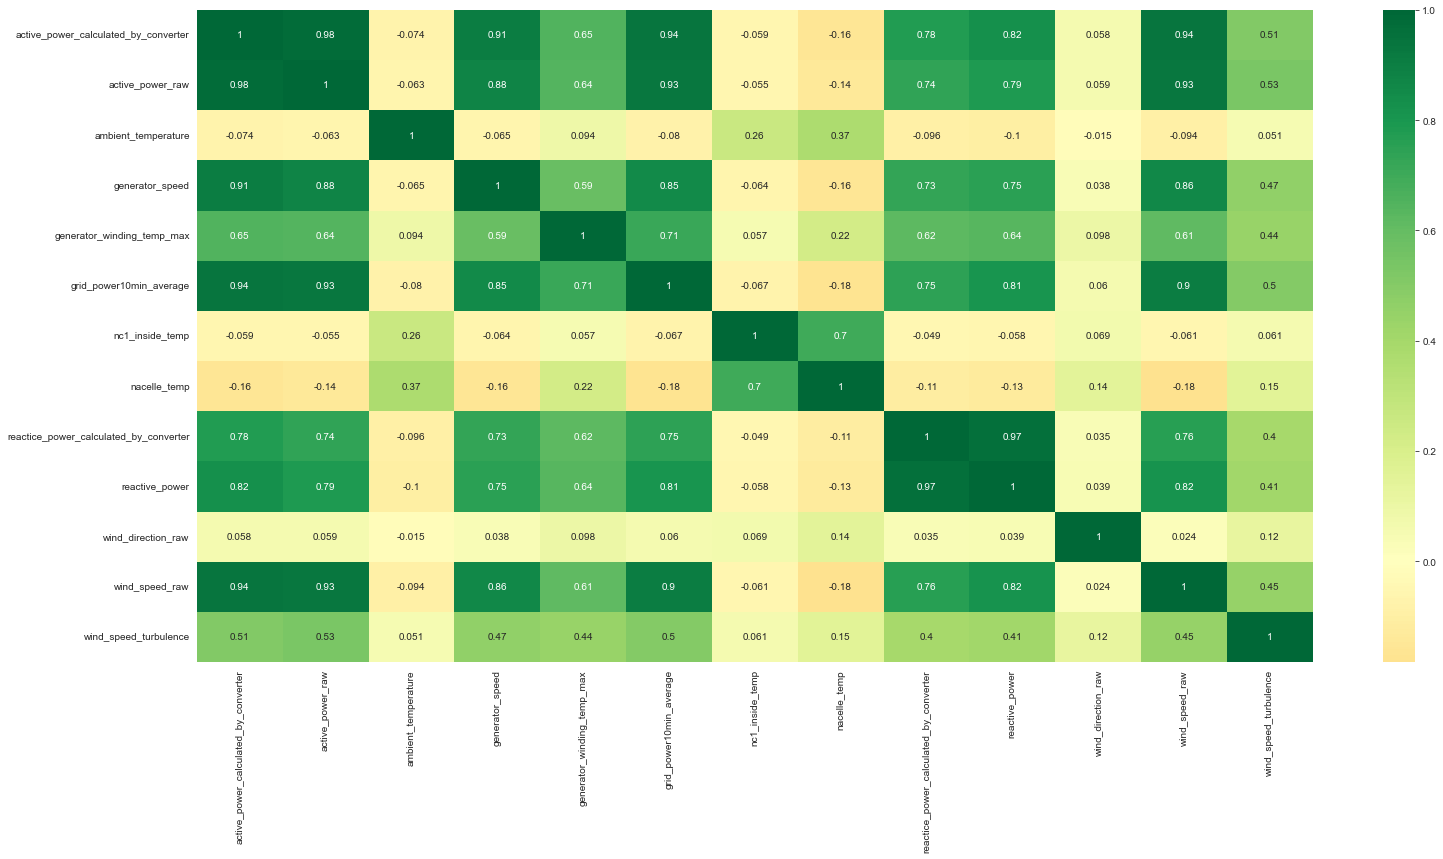

In [20]:
# Plotting a heatmap plot

from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=train_num_feat.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

**VIF Check**

In [16]:
# Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(train_num_feat) 

,Variables,VIF
0,active_power_calculated_by_converter,38.181699
1,active_power_raw,26.281814
9,reactive_power,21.902869
8,reactice_power_calculated_by_converter,17.417872
5,grid_power10min_average,12.335362
11,wind_speed_raw,10.142883
3,generator_speed,5.853446
7,nacelle_temp,3.367055
4,generator_winding_temp_max,3.303477
6,nc1_inside_temp,2.237131


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

I will remove one column at a time, starting with the highest VIF value, and see how it impacts the other VIF values.

In [18]:
train_num_feat = train_num_feat.drop('active_power_calculated_by_converter', axis=1)
calc_vif(train_num_feat)

KeyError: "['active_power_calculated_by_converter'] not found in axis"

We can see that the VIF value of "active_power_raw" has reduced drastically. We will check removing the next variable that has the highest VIF per the table above - "reactive_power".

In [19]:
train_num_feat = train_num_feat.drop('reactive_power', axis=1)
calc_vif(train_num_feat)

,Variables,VIF
0,active_power_raw,12.789917
4,grid_power10min_average,11.010275
9,wind_speed_raw,9.536501
2,generator_speed,4.913811
6,nacelle_temp,3.357488
3,generator_winding_temp_max,3.282933
7,reactice_power_calculated_by_converter,2.793075
5,nc1_inside_temp,2.233780
10,wind_speed_turbulence,1.571800
1,ambient_temperature,1.177466


In [20]:
train_num_feat = train_num_feat.drop('active_power_raw', axis=1)
calc_vif(train_num_feat)

,Variables,VIF
3,grid_power10min_average,9.079567
8,wind_speed_raw,7.078139
1,generator_speed,4.462074
5,nacelle_temp,3.333576
2,generator_winding_temp_max,3.266079
6,reactice_power_calculated_by_converter,2.782572
4,nc1_inside_temp,2.224449
9,wind_speed_turbulence,1.509133
0,ambient_temperature,1.176317
7,wind_direction_raw,1.045287


In [21]:
train_num_feat = train_num_feat.drop('grid_power10min_average', axis=1)
calc_vif(train_num_feat)

,Variables,VIF
7,wind_speed_raw,4.859732
1,generator_speed,4.183512
4,nacelle_temp,2.932531
5,reactice_power_calculated_by_converter,2.782485
2,generator_winding_temp_max,2.396746
3,nc1_inside_temp,2.140119
8,wind_speed_turbulence,1.438653
0,ambient_temperature,1.176237
6,wind_direction_raw,1.040311


We can see that removing "active_power_raw" does not impact the other independent variables much. We can stop here by dropping 'active_power_calculated_by_converter' and 'reactive_power' and look at further techniques for feature selection.

In [22]:
train_num_feat.head()

,ambient_temperature,generator_speed,generator_winding_temp_max,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.754969,1.217683,0.577310,0.023750,-0.099916,0.491302,0.777760,0.682465,-0.181267
1,-1.508825,-0.049678,-0.067461,0.162061,0.262363,-0.182065,0.949197,-0.090553,-0.532215
2,-1.131586,1.455545,0.108487,-4.905537,-3.179904,1.480174,-1.083126,1.115842,0.137915
3,0.294849,-0.865130,-2.296073,0.631422,0.235060,-0.516278,-1.060222,-0.938929,0.609483
4,0.730050,0.587518,0.418478,0.157430,-0.110827,0.439360,1.078729,0.359877,-1.226905


In [23]:
feat_cols_1 = ['ambient_temperature','generator_speed', 'generator_winding_temp_max',
                'nc1_inside_temp','nacelle_temp', 'reactice_power_calculated_by_converter',
                'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']

X = X[feat_cols_1]
X.shape

(909604, 9)

In [28]:
X.head()

,ambient_temperature,generator_speed,generator_winding_temp_max,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.754969,1.217683,0.577310,0.023750,-0.099916,0.491302,0.777760,0.682465,-0.181267
1,-1.508825,-0.049678,-0.067461,0.162061,0.262363,-0.182065,0.949197,-0.090553,-0.532215
2,-1.131586,1.455545,0.108487,-4.905537,-3.179904,1.480174,-1.083126,1.115842,0.137915
3,0.294849,-0.865130,-2.296073,0.631422,0.235060,-0.516278,-1.060222,-0.938929,0.609483
4,0.730050,0.587518,0.418478,0.157430,-0.110827,0.439360,1.078729,0.359877,-1.226905


**Wrapper Methods**

* Sequential Feature Selector - Forward Selection 
* Backward Elimination - Recursive Feature Elimination (RFE)
* Stepwise Selection: Bi-directional with a combination of Forward Selection & Backward Elimination

In [24]:
# Importing all necessary libraries

from math import sqrt
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from functools import partial
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

**Forward Selection Method - SFS() from Mlxtend**

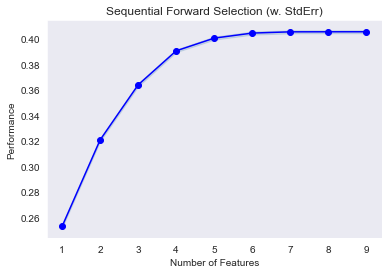

In [30]:
# Sequential Feature Selection (SFS)
sfs = SFS(LinearRegression(), k_features=9, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

We can see that the performance fairly remains same after k_features reaches 6. 

In [31]:
sfs = SFS(LinearRegression(), k_features=6, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)
#sfs.subsets_[6]['feature_names']
selected_1 = pd.DataFrame({'Feature' : sfs.k_feature_names_, 'Score' : sfs.k_score_})
print(selected_1)

                                  Feature     Score
0                     ambient_temperature  0.404438
1              generator_winding_temp_max  0.404438
2                         nc1_inside_temp  0.404438
3                            nacelle_temp  0.404438
4  reactice_power_calculated_by_converter  0.404438
5                   wind_speed_turbulence  0.404438


**SelectKBest with Pearson's f_regression**

In [32]:
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X,y)

feat_scores = pd.DataFrame({'Feature': X.columns, 'Pearsons Score' : fit.scores_})
print(feat_scores.sort_values(by=['Pearsons Score'], ascending=False))

                                  Feature  Pearsons Score
4                            nacelle_temp   308233.310336
0                     ambient_temperature   203039.981737
2              generator_winding_temp_max    90294.303811
3                         nc1_inside_temp    38314.508929
8                   wind_speed_turbulence     6024.374809
7                          wind_speed_raw     4687.293770
6                      wind_direction_raw     4558.237670
1                         generator_speed     1632.366452
5  reactice_power_calculated_by_converter     1527.207763


In [33]:
selected_2 = feat_scores.nlargest(6, 'Pearsons Score')
print(selected_2)

                      Feature  Pearsons Score
4                nacelle_temp   308233.310336
0         ambient_temperature   203039.981737
2  generator_winding_temp_max    90294.303811
3             nc1_inside_temp    38314.508929
8       wind_speed_turbulence     6024.374809
7              wind_speed_raw     4687.293770


**Backward Elimination: Recursive Forward Elimination Method RFE() from Sklearn**

In [35]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
np.random.seed(123)
#names = pd.DataFrame(X.columns)
model = LinearRegression()

#Define RFE 
rfe = RFE(model, step=1, n_features_to_select=6) 
my_values = rfe.fit(X,y)

#Create a dataframe for the results
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {
            'Feature' : feat_cols[i],
            'Selected' : my_values.support_[i],
            'RFE_Ranking' : my_values.ranking_[i]
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name = 'Columns'
df_RFE_results

,Feature,Selected,RFE_Ranking
Columns,,,
0,active_power_calculated_by_converter,True,1
1,active_power_raw,False,3
2,ambient_temperature,True,1
3,generator_speed,True,1
4,generator_winding_temp_max,True,1
5,grid_power10min_average,True,1
6,nc1_inside_temp,False,4
7,nacelle_temp,False,2
8,reactice_power_calculated_by_converter,True,1


In [36]:
selected_3 = df_RFE_results[df_RFE_results['RFE_Ranking'] == 1]
print(selected_3)

                                        Feature  Selected  RFE_Ranking
Columns                                                               
0          active_power_calculated_by_converter      True            1
2                           ambient_temperature      True            1
3                               generator_speed      True            1
4                    generator_winding_temp_max      True            1
5                       grid_power10min_average      True            1
8        reactice_power_calculated_by_converter      True            1


In [37]:
feat_list = {'SelectKBest' : selected_1['Feature'],
            'SFS FS' : selected_2['Feature'], 
            'RFE Linear' : selected_3['Feature']
            }
key_features = pd.DataFrame(feat_list)
key_features = key_features.apply(lambda x: pd.Series(x.dropna().values))
key_features

,SelectKBest,SFS FS,RFE Linear
0,ambient_temperature,ambient_temperature,active_power_calculated_by_converter
1,generator_winding_temp_max,generator_winding_temp_max,ambient_temperature
2,nc1_inside_temp,nc1_inside_temp,generator_speed
3,nacelle_temp,nacelle_temp,generator_winding_temp_max
4,reactice_power_calculated_by_converter,wind_speed_raw,grid_power10min_average
5,wind_speed_turbulence,wind_speed_turbulence,reactice_power_calculated_by_converter


**MODEL BUILDING - ALL FEATURES**

We will now test multiple REGRESSION models (Linear, RandomForest, Bagging, XGBoost & K-Neighbours) with the full dataset and compare the results. 

Later on, we will do the same with the selected featuresß dataset.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold

# creating test set of feature columns for prediction
X_test = test[feat_cols_1]

In [26]:
X_test.shape

(303202, 9)

In [27]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(818643, 9) (818643,) (90961, 9) (90961,)


LINEAR REGRESSION

In [41]:
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_val, y_val))*100
mape_lr = mean_absolute_percentage_error(y_val, lr_pred)

print(f"Training accuracy: {lr_train_acc} %")
print(f"Validation accuracy: {lr_val_acc} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr}")


Training accuracy: 40.52785008429274 %
Validation accuracy: 40.76297140340088 %
Linear Regression Mean Absolute Percent Error: 0.029941333934797896


RANDOM FOREST REGRESSION

In [43]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 96.76599087504995 %
Validation accuracy: 76.98030464259126 %
Random Forest Model Mean Absolute Percent Error: 0.016402675710235088


In [44]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False)[:6]

,Score
ambient_temperature,0.265125
nacelle_temp,0.242466
generator_winding_temp_max,0.111576
nc1_inside_temp,0.108515
wind_direction_raw,0.089943
generator_speed,0.052707


In [55]:
from sklearn.model_selection import RandomizedSearchCV
#rf_model = RandomForestRegressor()

rf_grid = {'max_features':[3],
          'n_estimators':[100,150,200,250,300,350],
          'max_depth':[7,9,12,15,25,35],
          'min_samples_split':[2,5,8,12,15,30,50,80],
          'min_samples_leaf':[5,10,15,20,30]}

rf_search_result = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=42)
rf_search_result.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=7, max_features=3, min_samples_leaf=20, min_samples_split=15, n_estimators=100; total time= 2.7min
[CV] END max_depth=7, max_features=3, min_samples_leaf=20, min_samples_split=15, n_estimators=100; total time= 2.7min
[CV] END max_depth=7, max_features=3, min_samples_leaf=20, min_samples_split=15, n_estimators=100; total time= 2.8min
[CV] END max_depth=12, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=200; total time= 8.6min
[CV] END max_depth=12, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=200; total time= 8.6min
[CV] END max_depth=12, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=200; total time= 8.9min
[CV] END max_depth=7, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=350; total time=10.4min
[CV] END max_depth=7, max_features=3, min_samples_leaf=10, min_samples_split=8, n_estimators=350; total time=

/Users/rishimadhav/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time= 4.7min
[CV] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time= 4.7min
[CV] END max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=50, n_estimators=100; total time= 4.7min
[CV] END max_depth=35, max_features=3, min_samples_leaf=15, min_samples_split=5, n_estimators=250; total time=16.6min
[CV] END max_depth=35, max_features=3, min_samples_leaf=15, min_samples_split=5, n_estimators=250; total time=16.7min
[CV] END max_depth=9, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time= 3.4min
[CV] END max_depth=9, max_features=3, min_samples_leaf=10, min_samples_split=12, n_estimators=100; total time= 3.5min
[CV] END max_depth=12, max_features=3, min_samples_leaf=30, min_samples_split=12, n_estimators=350; total time=17.9min
[CV] END max_depth=12, max_features=3, min_samples_leaf

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [7, 9, 12, 15, 25, 35],
                                        'max_features': [3],
                                        'min_samples_leaf': [5, 10, 15, 20, 30],
                                        'min_samples_split': [2, 5, 8, 12, 15,
                                                              30, 50, 80],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350]},
                   random_state=42, verbose=2)

In [56]:
rf_search_result.best_params_

{'n_estimators': 350, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 3, 'max_depth': 35}

In [59]:
rf_params = {'n_estimators': 350,
          'min_samples_split': 8,
          'min_samples_leaf' : 5,
          'max_features' : 3,
          'max_depth' : 35
          }
rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, max_features=3, min_samples_leaf=5,
                      min_samples_split=8, n_estimators=350)

rf_model=RandomForestRegressor(**rf_search_result.best_params_)

rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

In [60]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_val, y_val))

0.8739265041387931
0.7462955575171075


In [61]:
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 87.39265041387931 %
Validation accuracy: 74.62955575171075 %
Random Forest Model Mean Absolute Percent Error: 0.01785057156711862


CATBOOST REGRESSOR

In [42]:
from catboost import CatBoostRegressor, cv

cat_model = CatBoostRegressor(loss_function='MAPE')
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_val)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_val, y_val))*100
mape_cat = mean_absolute_percentage_error(y_val, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

0:	learn: 0.0407000	total: 128ms	remaining: 2m 7s
1:	learn: 0.0403925	total: 184ms	remaining: 1m 31s
2:	learn: 0.0401063	total: 239ms	remaining: 1m 19s
3:	learn: 0.0398308	total: 296ms	remaining: 1m 13s
4:	learn: 0.0395484	total: 352ms	remaining: 1m 10s
5:	learn: 0.0392750	total: 413ms	remaining: 1m 8s
6:	learn: 0.0390198	total: 467ms	remaining: 1m 6s
7:	learn: 0.0387574	total: 523ms	remaining: 1m 4s
8:	learn: 0.0385070	total: 581ms	remaining: 1m 3s
9:	learn: 0.0382678	total: 647ms	remaining: 1m 4s
10:	learn: 0.0380184	total: 711ms	remaining: 1m 3s
11:	learn: 0.0377786	total: 774ms	remaining: 1m 3s
12:	learn: 0.0375507	total: 838ms	remaining: 1m 3s
13:	learn: 0.0373281	total: 904ms	remaining: 1m 3s
14:	learn: 0.0371166	total: 963ms	remaining: 1m 3s
15:	learn: 0.0368986	total: 1.02s	remaining: 1m 3s
16:	learn: 0.0366950	total: 1.08s	remaining: 1m 2s
17:	learn: 0.0364887	total: 1.15s	remaining: 1m 2s
18:	learn: 0.0362886	total: 1.2s	remaining: 1m 2s
19:	learn: 0.0361012	total: 1.26s	rema

**Cross-Validation on CatBoost**

In [28]:
CATBOOST_PARAMS = {
    'random_seed':47,
    'learning_rate':0.4,
    'iterations':1000,
    'max_depth':12,
    'early_stopping_rounds':10,
    'min_data_in_leaf':12}

In [29]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(**CATBOOST_PARAMS)

cb_model.fit(X_train, y_train)
cb_pred = cb_model.predict(X_val)

cb_train_acc = (cb_model.score(X_train, y_train))*100
cb_val_acc = (cb_model.score(X_val, y_val))*100
mape_cb = mean_absolute_percentage_error(y_val, cb_pred)

print(f"Training accuracy: {cb_train_acc} %")
print(f"Validation accuracy: {cb_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cb}")


0:	learn: 2.1906114	total: 168ms	remaining: 2m 47s
1:	learn: 1.9735144	total: 247ms	remaining: 2m 3s
2:	learn: 1.8548562	total: 323ms	remaining: 1m 47s
3:	learn: 1.7921512	total: 395ms	remaining: 1m 38s
4:	learn: 1.7490334	total: 479ms	remaining: 1m 35s
5:	learn: 1.7158510	total: 556ms	remaining: 1m 32s
6:	learn: 1.6985530	total: 630ms	remaining: 1m 29s
7:	learn: 1.6846249	total: 701ms	remaining: 1m 26s
8:	learn: 1.6696466	total: 775ms	remaining: 1m 25s
9:	learn: 1.6610347	total: 842ms	remaining: 1m 23s
10:	learn: 1.6488338	total: 926ms	remaining: 1m 23s
11:	learn: 1.6400031	total: 1s	remaining: 1m 22s
12:	learn: 1.6326672	total: 1.08s	remaining: 1m 21s
13:	learn: 1.6261921	total: 1.16s	remaining: 1m 21s
14:	learn: 1.6190473	total: 1.24s	remaining: 1m 21s
15:	learn: 1.6130106	total: 1.36s	remaining: 1m 23s
16:	learn: 1.6063121	total: 1.44s	remaining: 1m 23s
17:	learn: 1.6013632	total: 1.51s	remaining: 1m 22s
18:	learn: 1.5957493	total: 1.59s	remaining: 1m 22s
19:	learn: 1.5899149	total

In [32]:
print(cb_model.get_feature_importance(prettified=True))


                               Feature Id  Importances
0                     ambient_temperature    19.047236
1                            nacelle_temp    17.633943
2              generator_winding_temp_max    13.924221
3                         nc1_inside_temp    13.568879
4                      wind_direction_raw    13.085285
5  reactice_power_calculated_by_converter     7.834308
6                         generator_speed     5.646714
7                   wind_speed_turbulence     5.269985
8                          wind_speed_raw     3.989429


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cat_model = CatBoostRegressor(loss_function='MAPE')

grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
          'max_depth':[0,2,4,6,8,10,12,14,16],
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'min_data_in_leaf':[1,2,3,4,5,6,7,8,9,10]}

randomized_search_result = cat_model.randomized_search(grid,
            X,
            y,
            cv=5,
            partition_random_seed=42,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=None,
            train_size=0.8,
            verbose=0,
            plot=False)

cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_val)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_val, y_val))*100
mape_cat = mean_absolute_percentage_error(y_val, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

In [44]:
print(model.get_feature_importance(prettified=True))

                                Feature Id  Importances
0                             nacelle_temp    20.125702
1                      ambient_temperature    18.400556
2               generator_winding_temp_max    16.171039
3                          nc1_inside_temp    15.734698
4                       wind_direction_raw     8.473768
5                  grid_power10min_average     8.105800
6   reactice_power_calculated_by_converter     6.648364
7                         active_power_raw     2.561000
8                    wind_speed_turbulence     2.065475
9                          generator_speed     1.025831
10                          wind_speed_raw     0.687767


In [45]:
print(model.get_best_score())

{'learn': {'MAPE': 0.020807281315319583}}


**MODEL EVALUATION TABLE**

In [78]:
models = pd.DataFrame({
    'Model': ['Linear Regression','XGBoost Regressor', 
             'Random Forest Regressor', 'CatBoost Regressor'],
    'Training Accuracy %' : [lr_train_acc, xg_train_acc, rf_train_acc, cat_train_acc],
    'Validation Accuracy %' : [lr_val_acc, xg_val_acc, rf_val_acc, cat_val_acc],
    'MAPE Score' : [mape_lr, mape_xg, mape_rf, mape_cat]
})

models.sort_values(by = ['MAPE Score'],ascending = True)

,Model,Training Accuracy %,Validation Accuracy %,MAPE Score
3,Random Forest Regressor,96.998899,78.496042,0.015786
4,CatBoost Regressor,80.832951,67.381752,0.019251
1,XGBoost Regressor,70.877773,68.583001,0.021315
0,Linear Regression,41.124234,41.395850,0.029890
2,AdaBoost Regressor,16.117634,16.154187,0.037768


It looks like the Random Forest Regressor has performed well with the lowest MAPE value amongst all and with the highest model score overall. We will now run the same models with the features derived from RF and CatBoost Feature importance methods and check if there is a difference in the above comparison.

**MODEL BUILDING - WITH SELECTED COLUMNS FROM FEATURE SELECTION**

* ambient temperature
* generator_winding_temp_max
* nc1_inside_temp
* nacelle_temp
* grid_power10min_average
* wind_direction_raw

In [79]:
# Columns derived from the Feature Selection methods (Top 6)
sel_cols = ['ambient_temperature','generator_winding_temp_max', 'nc1_inside_temp', 'nacelle_temp',
            'wind_direction_raw', 'grid_power10min_average']

X_sel = train[sel_cols]
y = train['Target']

# creating test set of the selected feature columns for prediction
X_test = test[sel_cols]

In [80]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET
X_train, X_val, y_train, y_val = train_test_split(X_sel, y, train_size=0.9, random_state=42)

X_train.shape

(818643, 6)

In [81]:
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_val, y_val))*100
mape_lr = mean_absolute_percentage_error(y_val, lr_pred)

print(f"Training accuracy: {lr_train_acc} %")
print(f"Validation accuracy: {lr_val_acc} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr}")

Training accuracy: 41.72593597843955 %
Validation accuracy: 41.950065354505995 %
Linear Regression Mean Absolute Percent Error: 0.029874588755913364


In [82]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 96.87592280077958 %
Validation accuracy: 77.60800262636856 %
Random Forest Model Mean Absolute Percent Error: 0.015796501046984036


In [83]:
from pprint import pprint
pprint(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [84]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestRegressor()

rf_grid = {'max_features':['auto','sqrt'],
          'n_estimators':[100,150,200,250,300,350],
          'max_depth':[7,9,12,15,25,35],
          'min_samples_split':[2,5,8,12,15,30,50,80],
          'min_samples_leaf':[5,10,15,20,30]}

rf_search_result = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_grid, 
            n_iter=100, cv=1, verbose=1, n_jobs=-1)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 96.88460815620004 %
Validation accuracy: 77.6967335325558 %
Random Forest Model Mean Absolute Percent Error: 0.015781926935401504


In [33]:
# XG Boost Regressor
XGB_model = XGBRegressor(booster='gbtree')
XGB_model.fit(X_train, y_train)
XGB_pred = XGB_model.predict(X_val)

xg_train_acc = (XGB_model.score(X_train, y_train))*100
xg_val_acc = (XGB_model.score(X_val, y_val))*100
mape_xg = mean_absolute_percentage_error(y_val, XGB_pred)

print(f"Training accuracy: {xg_train_acc} %")
print(f"Validation accuracy: {xg_val_acc} %")
print(f"XGBoost Model Mean Absolute Percent Error: {mape_xg}")

Training accuracy: 66.49745181794869 %
Validation accuracy: 65.30557807393956 %
XGBoost Model Mean Absolute Percent Error: 0.02237284278459981


In [34]:
from sklearn.model_selection import RandomizedSearchCV
cat_model = CatBoostRegressor(iterations=120, loss_function='MAPE')

grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
          'depth':[0,2,4,6,8,10,12,14,16],
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'min_data_in_leaf':[1,2,3,4,5,6,7,8,9,10]}

randomized_search_result = cat_model.randomized_search(grid,
            X,
            y,
            cv=5,
            partition_random_seed=42,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=None,
            train_size=0.8,
            verbose=0,
            plot=False)

cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_val)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_val, y_val))*100
mape_cat = mean_absolute_percentage_error(y_val, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

0:	learn: 0.7999123	test: 0.7999099	best: 0.7999099 (0)	total: 72.7ms	remaining: 1m 12s
1:	learn: 0.6404940	test: 0.6405346	best: 0.6405346 (1)	total: 275ms	remaining: 2m 17s
2:	learn: 0.5131551	test: 0.5132194	best: 0.5132194 (2)	total: 460ms	remaining: 2m 32s
3:	learn: 0.4112178	test: 0.4113052	best: 0.4113052 (3)	total: 533ms	remaining: 2m 12s
4:	learn: 0.3298553	test: 0.3299745	best: 0.3299745 (4)	total: 716ms	remaining: 2m 22s
5:	learn: 0.2649173	test: 0.2650443	best: 0.2650443 (5)	total: 780ms	remaining: 2m 9s
6:	learn: 0.2131477	test: 0.2132818	best: 0.2132818 (6)	total: 965ms	remaining: 2m 16s
7:	learn: 0.1721899	test: 0.1723529	best: 0.1723529 (7)	total: 1.15s	remaining: 2m 22s
8:	learn: 0.1396849	test: 0.1398750	best: 0.1398750 (8)	total: 1.32s	remaining: 2m 25s
9:	learn: 0.1139547	test: 0.1141647	best: 0.1141647 (9)	total: 1.46s	remaining: 2m 24s
10:	learn: 0.0938313	test: 0.0940608	best: 0.0940608 (10)	total: 1.62s	remaining: 2m 25s
11:	learn: 0.0781413	test: 0.0783806	best

KeyboardInterrupt: 

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression','XGBoost Regressor', 
             'AdaBoost Regressor', 'Random Forest Regressor', 'CatBoost Regressor'],
    'Training Accuracy' : [lr_train_acc, xg_train_acc, ada_train_acc, rf_train_acc, cat_train_acc],
    'Validation Accuracy' : [lr_val_acc, xg_val_acc, ada_val_acc, rf_val_acc, cat_val_acc],
    'MAPE Score (%)' : [mape_lr, mape_xg, mape_ada, mape_rf, mape_cat]
})

models.sort_values(by = ['MAPE Score'],ascending = True)

,Model,Training Accuracy,Validation Accuracy,MAPE Score (%)
3,Random Forest Regressor,96.884503,77.572596,1.582502
4,CatBoost Regressor,68.077018,64.662671,1.903438
1,XGBoost Regressor,68.457709,66.551026,2.191139
0,Linear Regression,41.725936,41.950065,2.987459
2,AdaBoost Regressor,16.114850,16.154497,3.776702


For both the approaches (Full Dataset & Dataset with Selected Features), Random Forest seems to be the best model. I will try and optimize the Random Forest model a little more to use the RandomSearch CV and GridSearch CV methods to check if we can improve the accuracy scores for both approaches.

**PREDICTION**

As we can see from the above the RF Regressor on the 10 features as derived from the initial RF regressor model provided a slightly better model in terms of MAPE value. We will consider the above RF Model to predict on the test set and generate the submission file.

In [ ]:
test['Target'] = rf_model.predict(X_test)
test['Target'].to_csv('./ReNew_Participants_Data/my_submission.csv', index=False)

In [ ]:
test['Target'] = cat_model.predict(X_test)
test['Target'].to_csv('my_submission.csv', index=False)